In [5]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from tools.DataLoader import DataLoader
from tools.DataSet import DataSet
from tools.ModelTester import ModelTester
from models import Models
from tools.Metrics import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
dl = DataLoader("data/train.csv", class_col_name="species", excluded_features={"id"})
dl.load()
dataset = dl.get_dataset()

print(f"Number of data entries : {len(dataset)}")
print(f"Number of classes : {len(dataset.group_by_class())}")

grouppedClasses = pd.DataFrame(
    data=np.array([ len(ds) for ds in dataset.group_by_class() ]),
    columns=["Count"],
    index=[f"{dl.get_label_name(ds.labels[0])}" for ds in dataset.group_by_class()]
)
display(grouppedClasses)

dataset.shuffle()
train_set, test_set = dataset.stratified_split([0.7])
print(f"Train set : {len(train_set)} - Number of classes : {len(train_set.group_by_class())}")
print(f"Train set : {len(test_set)} - Number of classes : {len(test_set.group_by_class())}")

Number of data entries : 990
Number of classes : 99


,Count
Acer_Opalus,10
Pterocarya_Stenoptera,10
Quercus_Hartwissiana,10
Tilia_Tomentosa,10
Quercus_Variabilis,10
...,...
Ulmus_Bergmanniana,10
Quercus_Nigra,10
Salix_Intergra,10
Quercus_Infectoria_sub,10


Train set : 693 - Number of classes : 99
Train set : 297 - Number of classes : 99


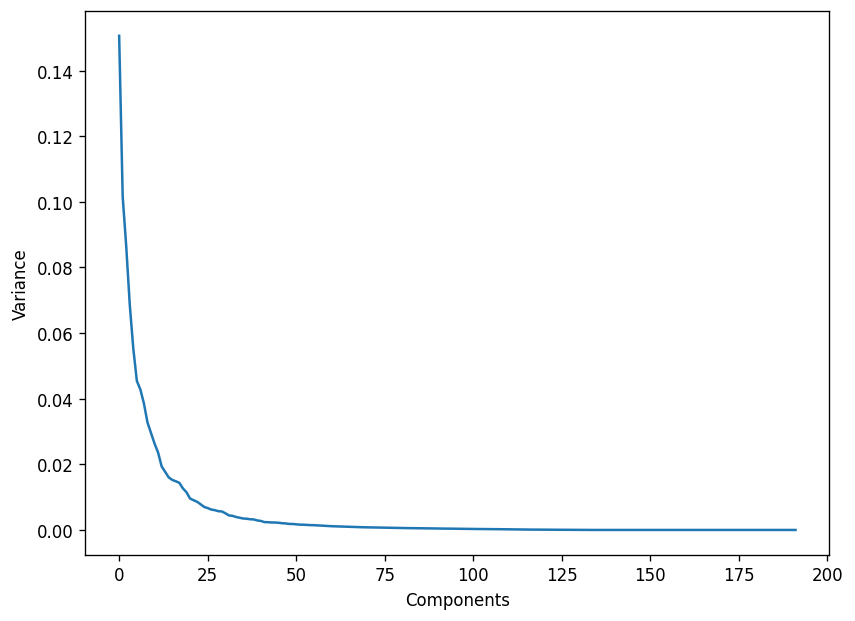

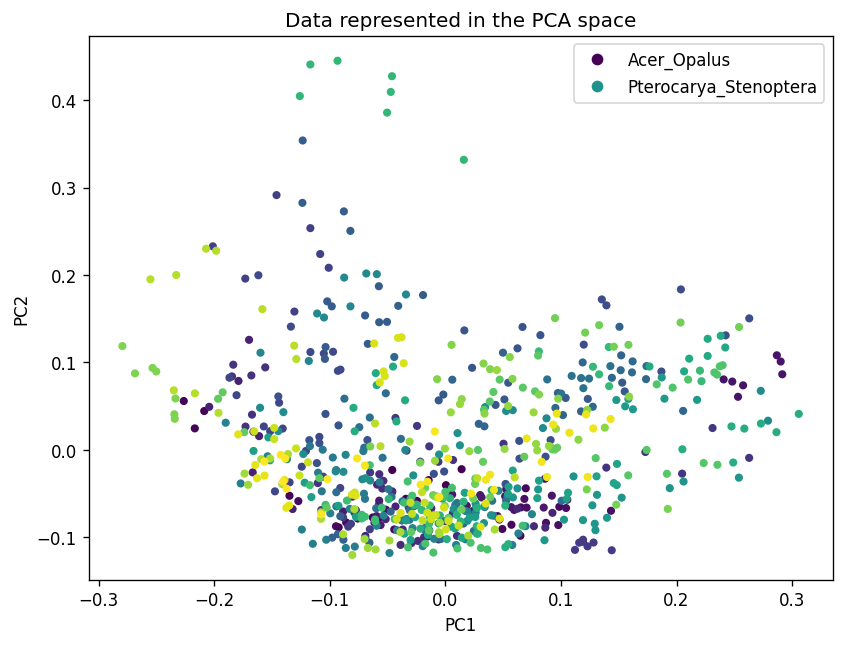

In [7]:
from sklearn.decomposition import PCA

# Project into the PCA space (2 major axis)
pca = PCA()
pcaSpace = pca.fit_transform(train_set.features)
pcaSpaceXY = (pcaSpace[:,0], pcaSpace[:,1])

# Plot PCA axis contributions
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel("Variance")
plt.xlabel("Components")
plt.show()

# Plot data in the PCA space (2 major axis)
plt.figure(figsize=(8, 6), dpi=120)
plt.xlabel("PC1")
plt.ylabel("PC2")
scatter = plt.scatter(x=pcaSpaceXY[0], y=pcaSpaceXY[1], c=train_set.labels, s=15)
plt.legend(handles=scatter.legend_elements(num=3)[0], labels=dl.classes)
plt.title("Data represented in the PCA space", loc='center', wrap=True)
plt.show()

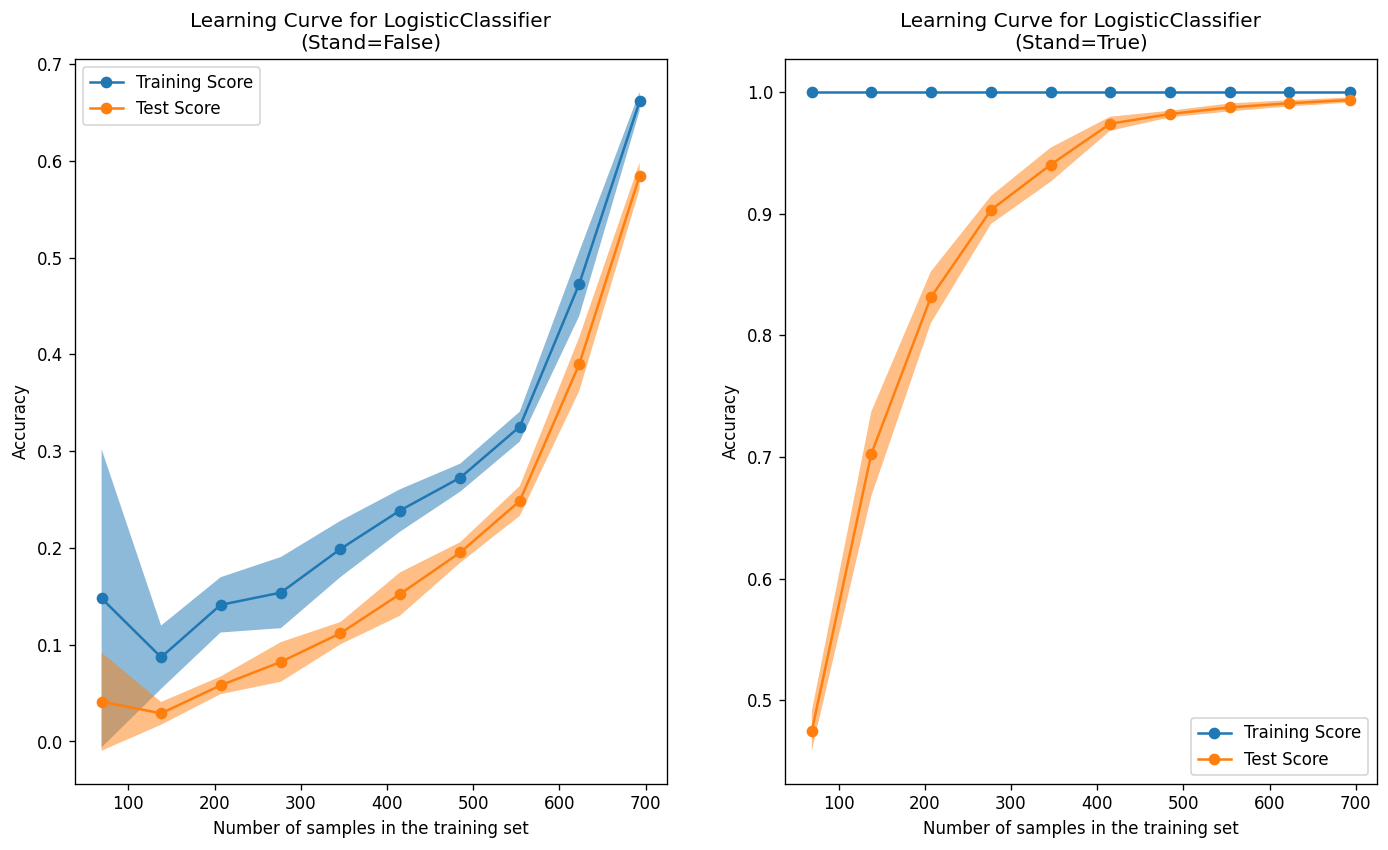

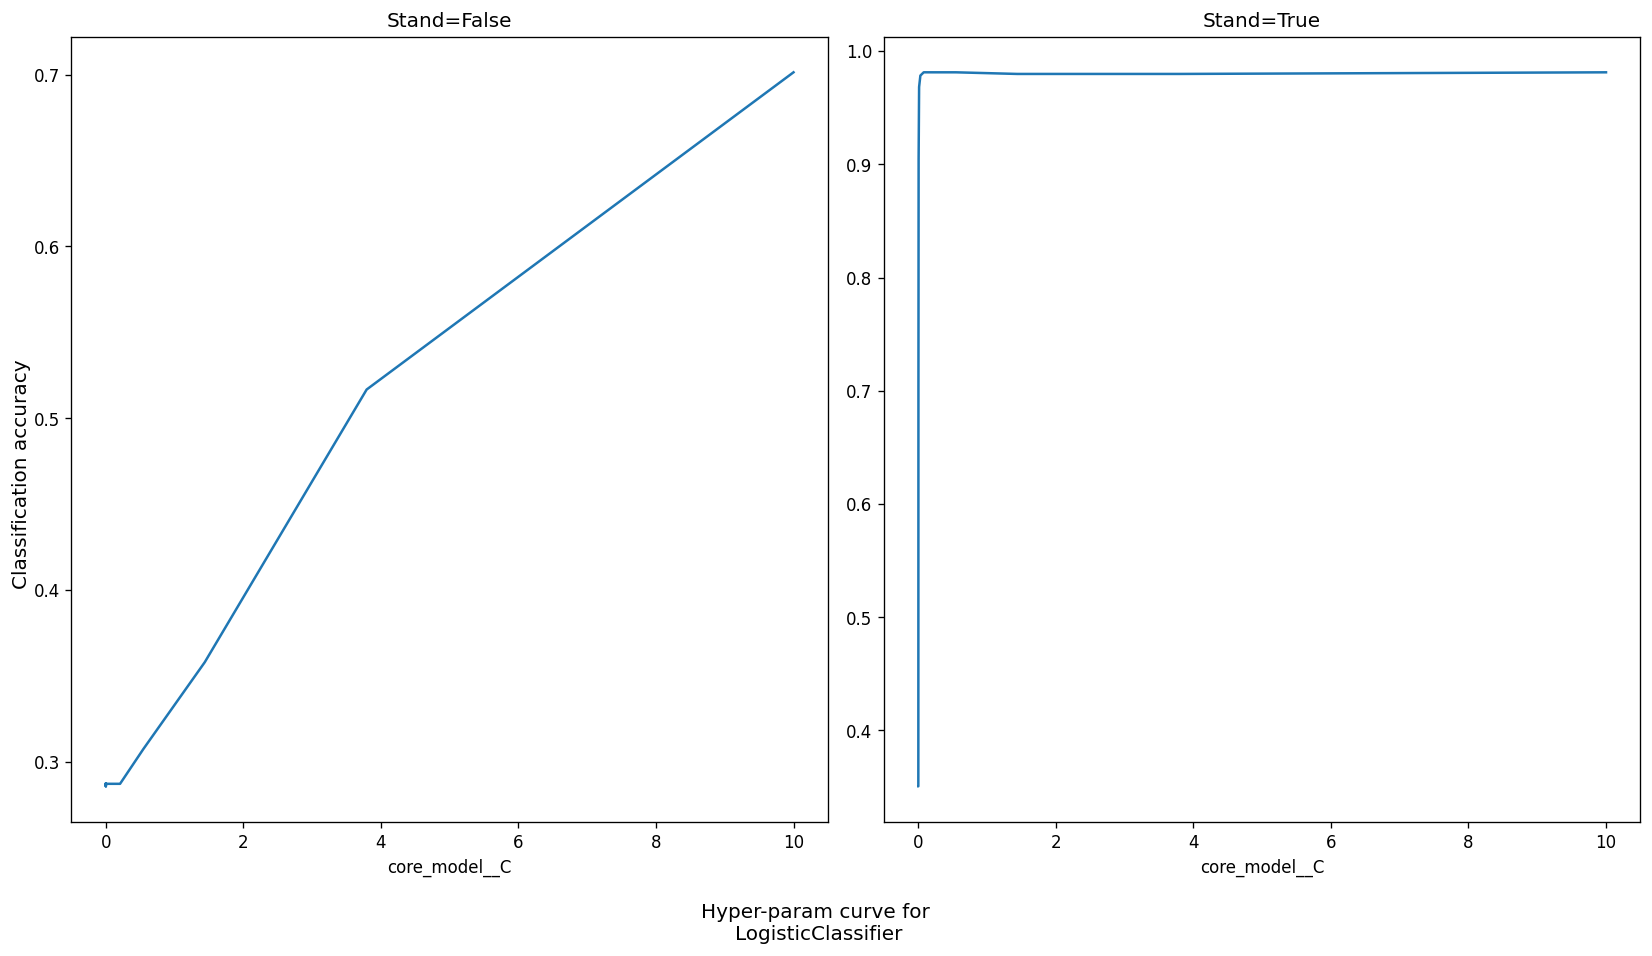

,[TRAIN] LogisticClassifier (Stand=False),[TEST] LogisticClassifier (Stand=False),[TRAIN] LogisticClassifier (Stand=True),[TEST] LogisticClassifier (Stand=True)
Accuracy,0.906205,0.845118,1.000000,0.986532
Precision,0.906205,0.845118,1.000000,0.986532
Recall,0.906205,0.845118,1.000000,0.986532
F1 Score,0.906205,0.845118,1.000000,0.986532
ROC AUC,0.997901,0.994686,1.000000,0.999966
Log loss,2.384302,2.531210,0.231667,0.404665


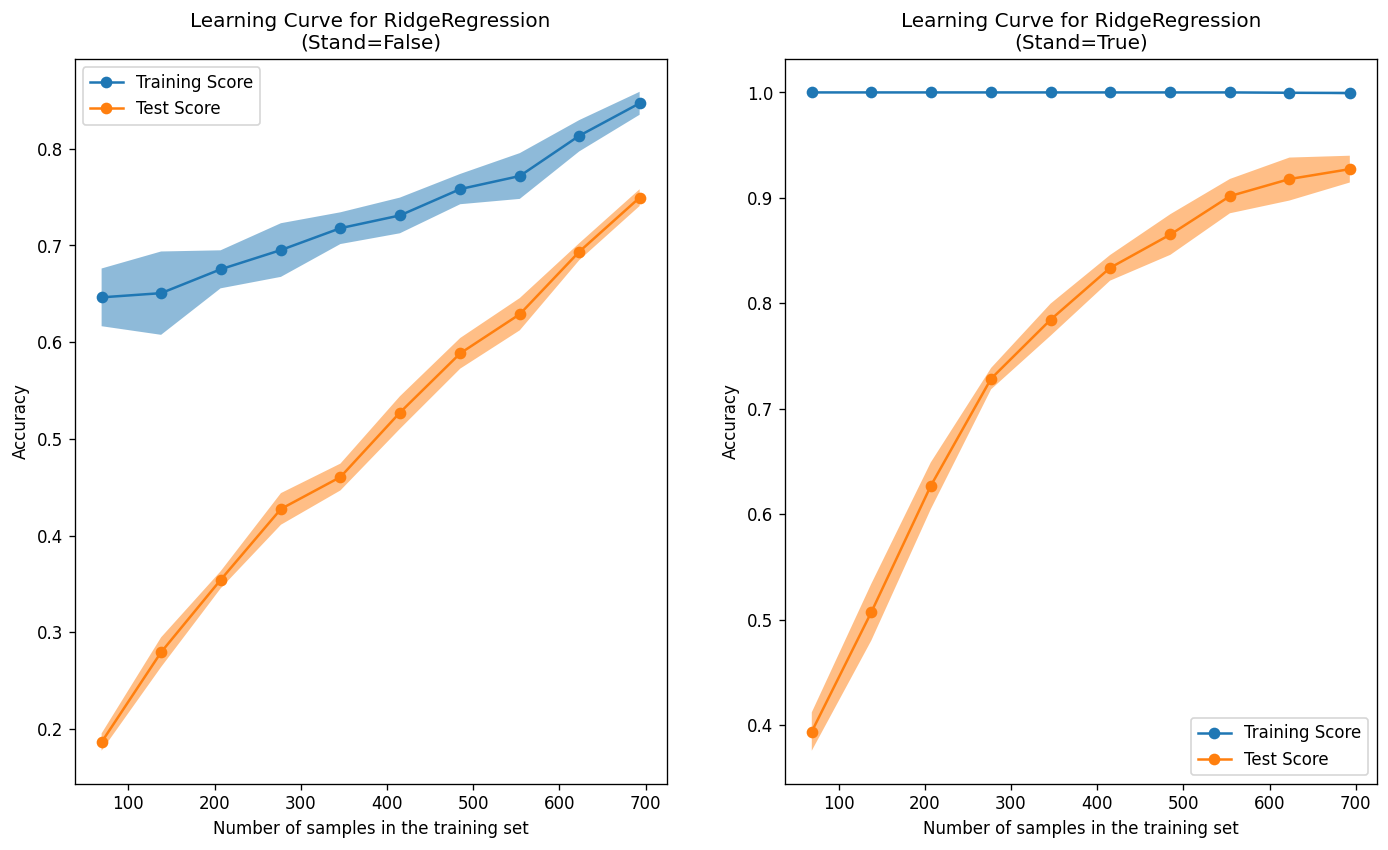

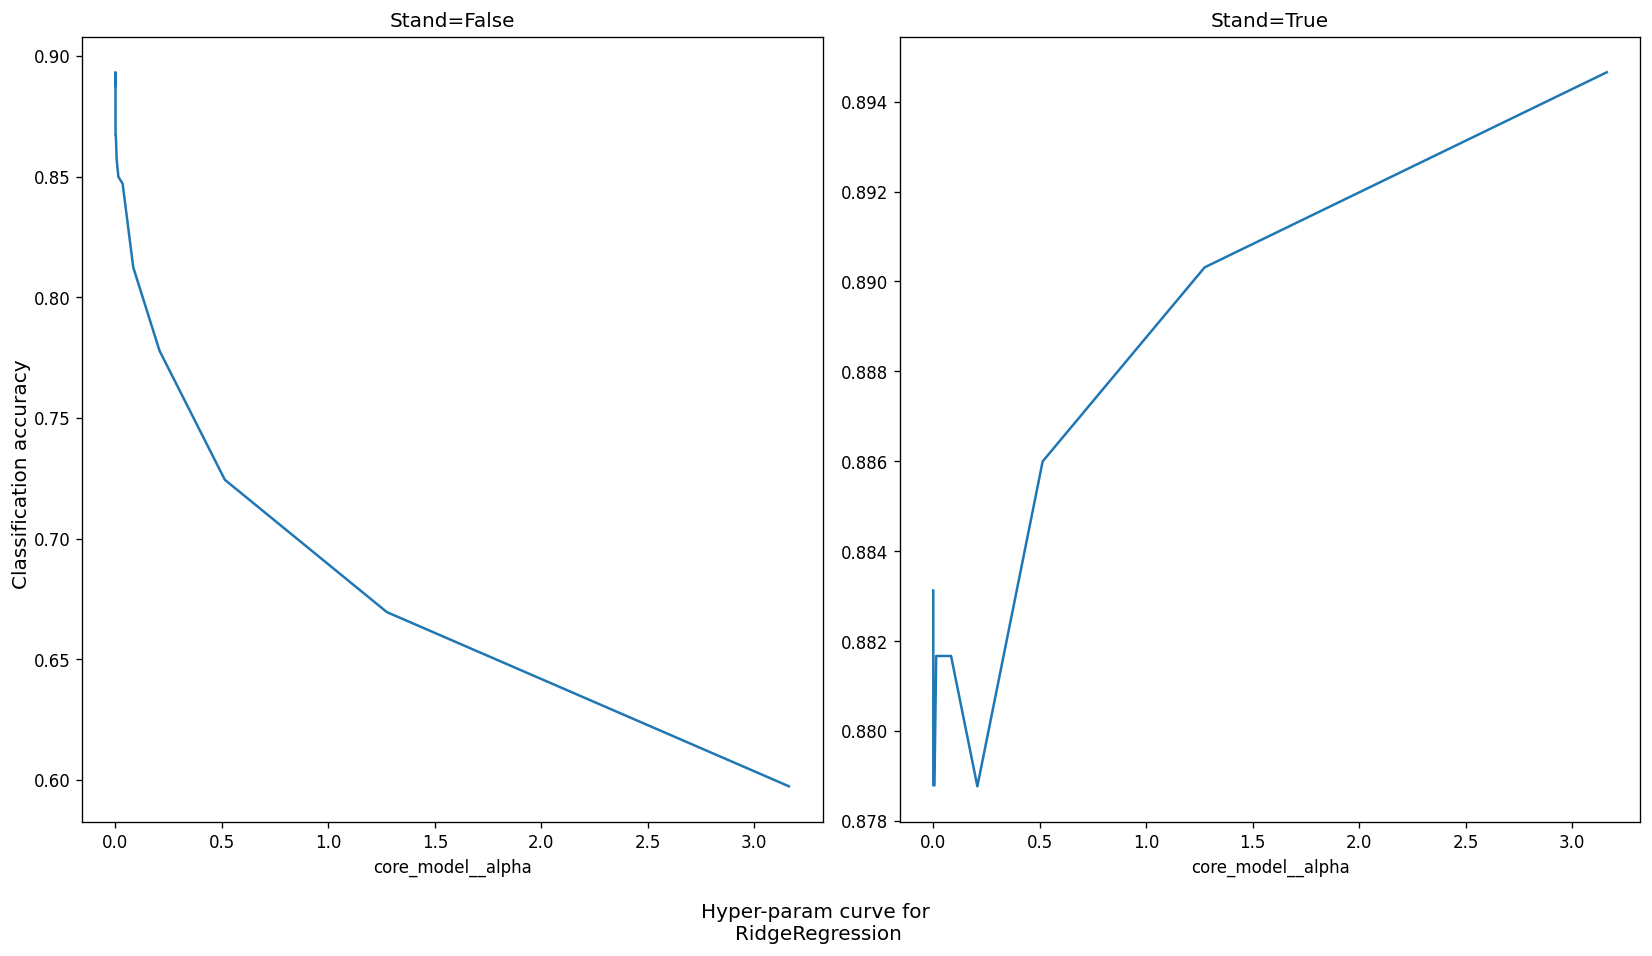

,[TRAIN] RidgeRegression (Stand=False),[TEST] RidgeRegression (Stand=False),[TRAIN] RidgeRegression (Stand=True),[TEST] RidgeRegression (Stand=True)
Accuracy,0.9971139971139971,0.9259259259259259,0.9971139971139971,0.936026936026936
Precision,0.9971139971139971,0.9259259259259259,0.9971139971139971,0.936026936026936
Recall,0.9971139971139971,0.9259259259259259,0.9971139971139971,0.936026936026936
F1 Score,0.9971139971139971,0.9259259259259259,0.9971139971139971,0.936026936026936
ROC AUC,Not Applicable,Not Applicable,Not Applicable,Not Applicable
Log loss,Not Applicable,Not Applicable,Not Applicable,Not Applicable


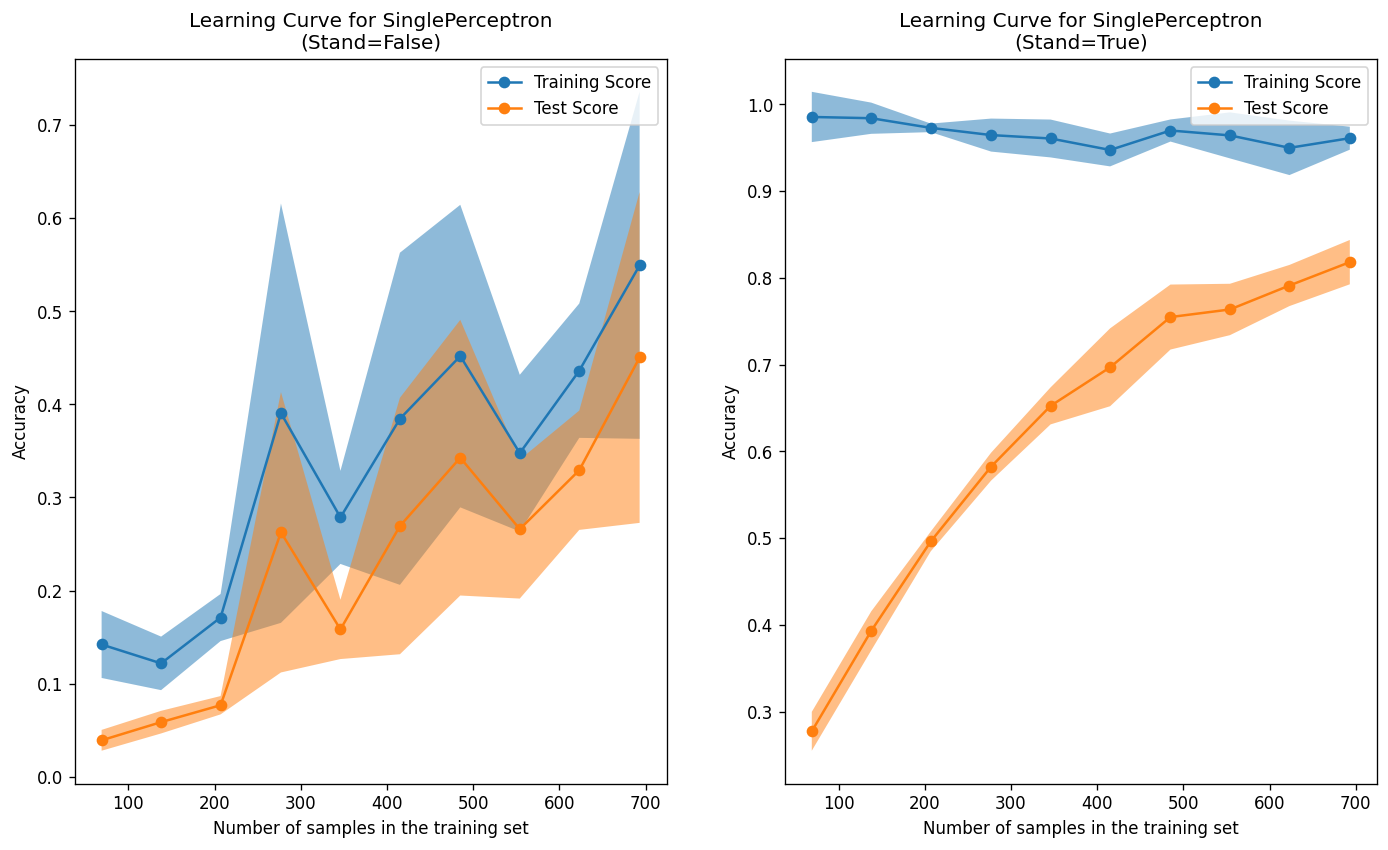

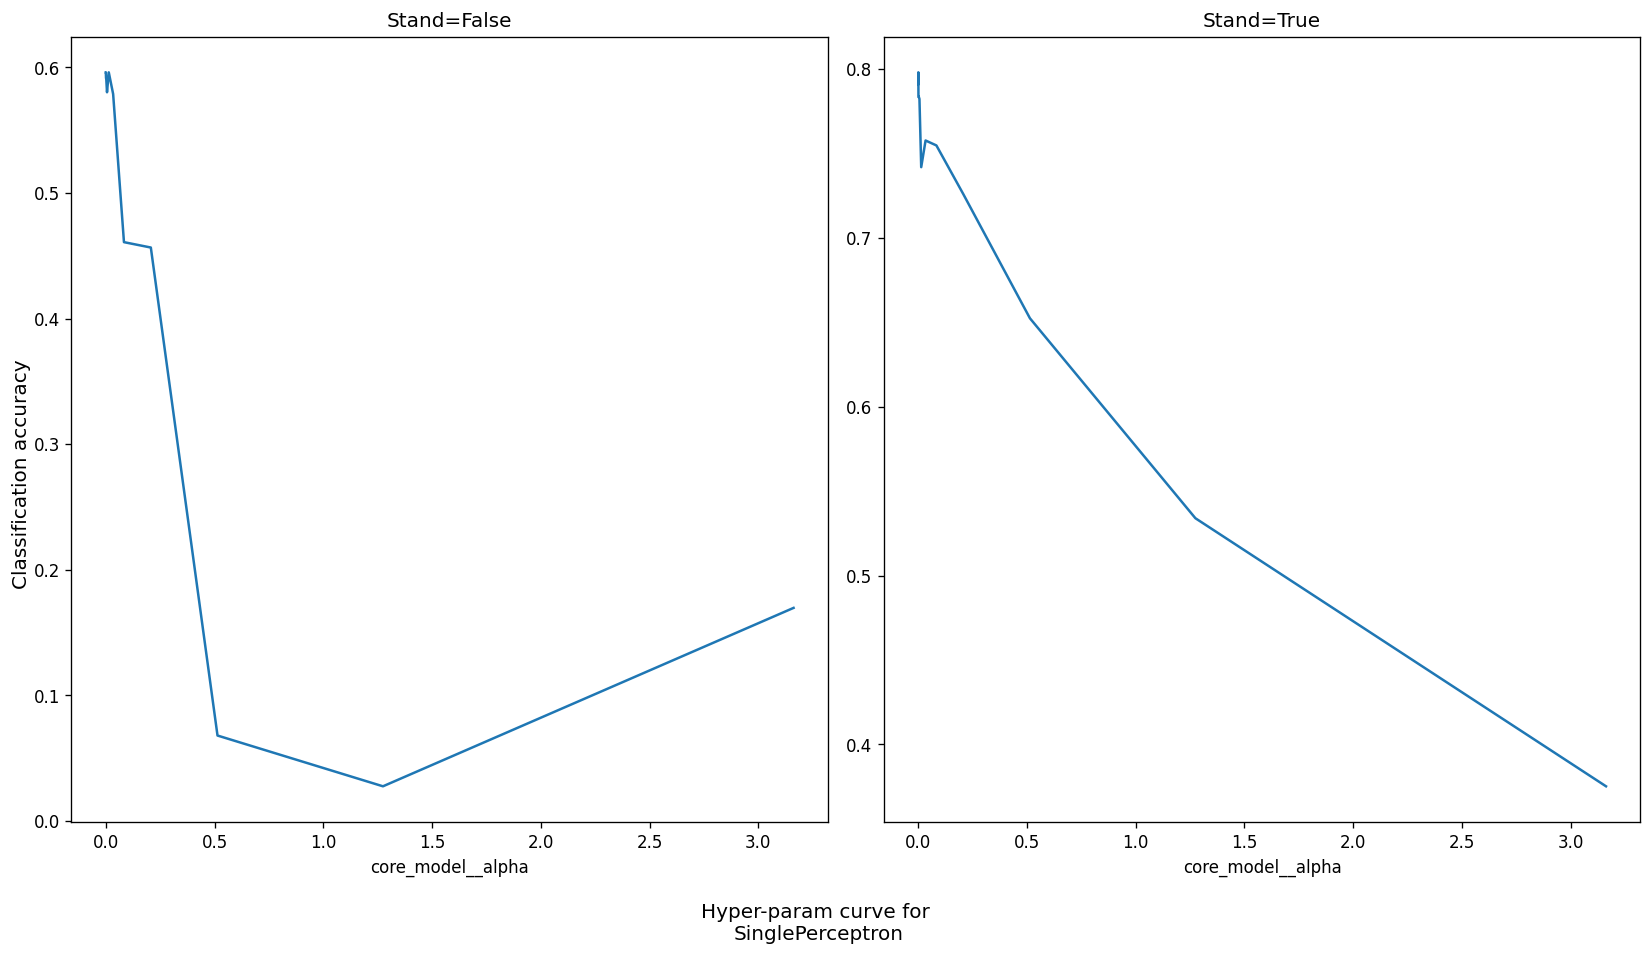

,[TRAIN] SinglePerceptron (Stand=False),[TEST] SinglePerceptron (Stand=False),[TRAIN] SinglePerceptron (Stand=True),[TEST] SinglePerceptron (Stand=True)
Accuracy,0.8181818181818182,0.7575757575757576,0.9783549783549783,0.8181818181818182
Precision,0.8181818181818182,0.7575757575757576,0.9783549783549783,0.8181818181818182
Recall,0.8181818181818182,0.7575757575757576,0.9783549783549783,0.8181818181818182
F1 Score,0.8181818181818182,0.7575757575757576,0.9783549783549783,0.8181818181818182
ROC AUC,Not Applicable,Not Applicable,Not Applicable,Not Applicable
Log loss,Not Applicable,Not Applicable,Not Applicable,Not Applicable


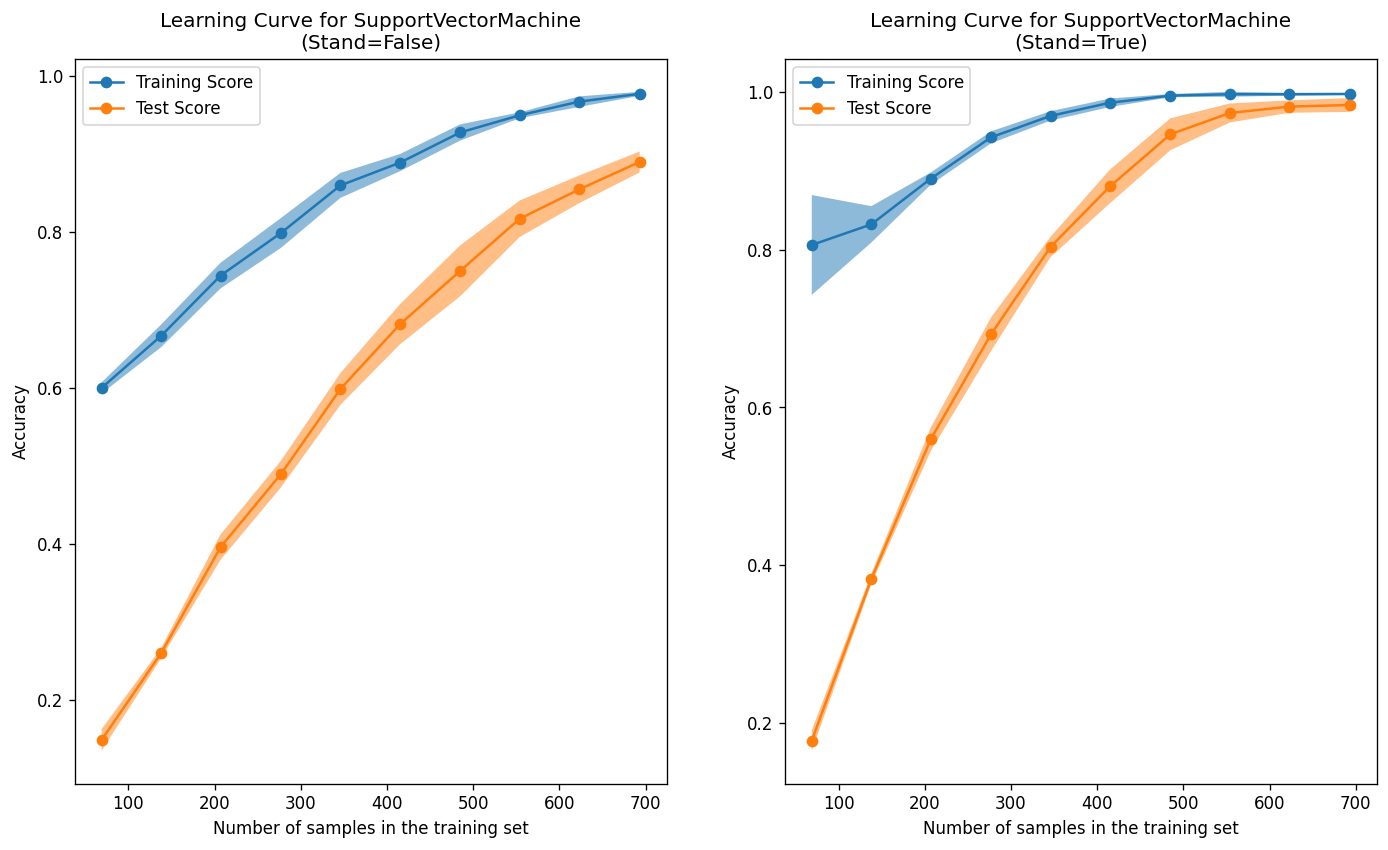

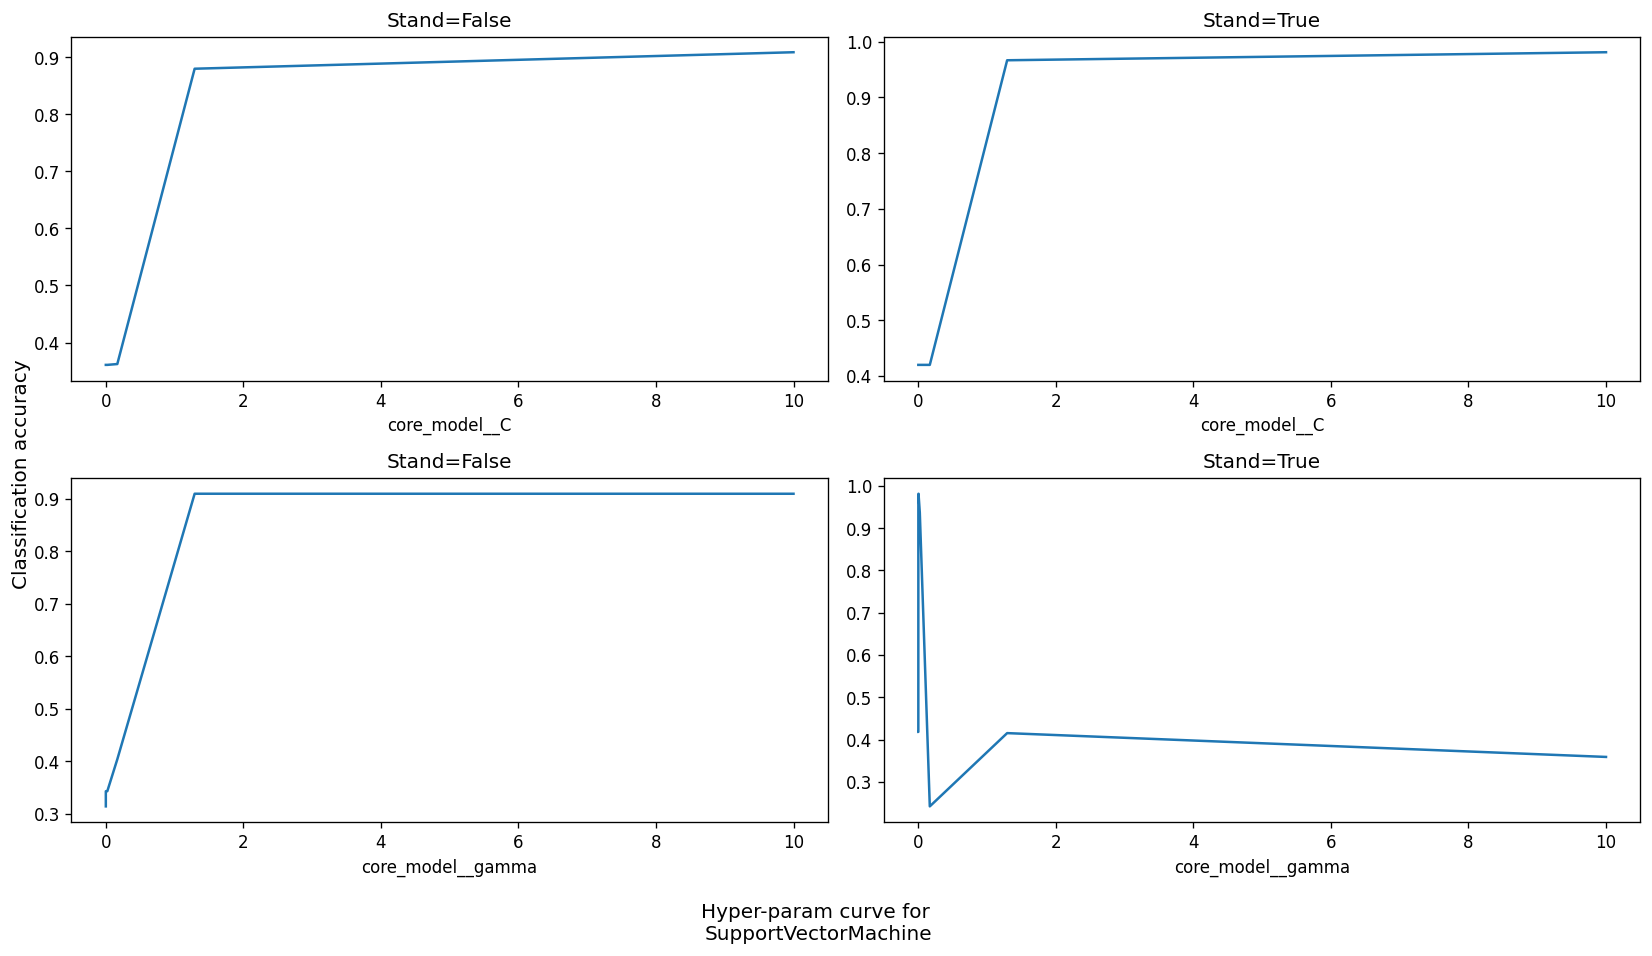

,[TRAIN] SupportVectorMachine (Stand=False),[TEST] SupportVectorMachine (Stand=False),[TRAIN] SupportVectorMachine (Stand=True),[TEST] SupportVectorMachine (Stand=True)
Accuracy,1.000000,0.909091,1.000000,0.979798
Precision,1.000000,0.909091,1.000000,0.979798
Recall,1.000000,0.909091,1.000000,0.979798
F1 Score,1.000000,0.909091,1.000000,0.979798
ROC AUC,0.999987,0.998374,1.000000,0.999702
Log loss,2.282750,2.469407,2.323821,2.497269


In [8]:
# Logistic Regression :
mt = ModelTester("LogisticClassifier")
mt.test(dataset, train_set, test_set)

# Ridge Regression : 
mt = ModelTester("RidgeRegression")
mt.test(dataset, train_set, test_set)

# Perceptron : 
mt = ModelTester("SinglePerceptron")
mt.test(dataset, train_set, test_set)

# SVM : 
mt = ModelTester("SupportVectorMachine")
mt.test(dataset, train_set, test_set)

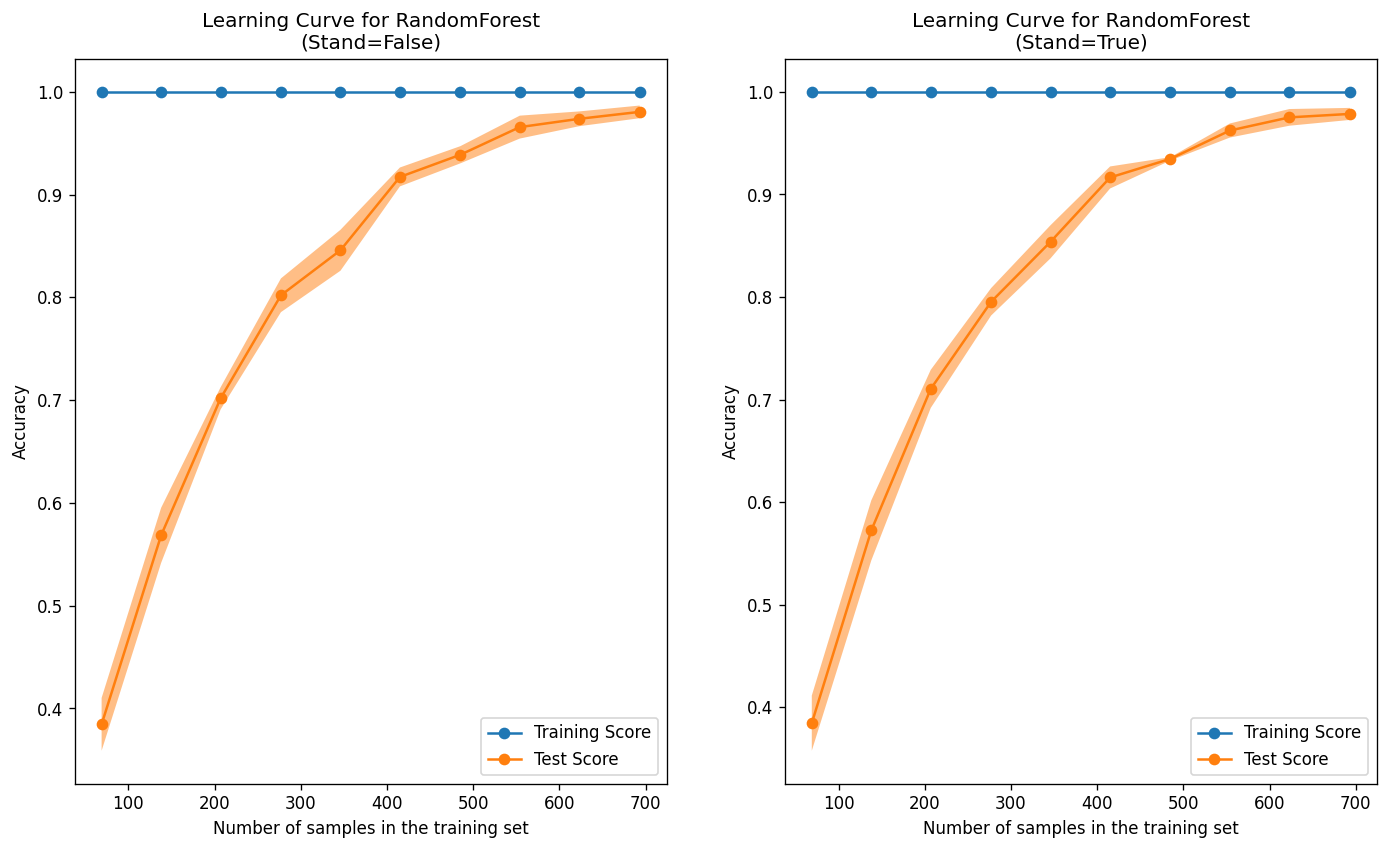

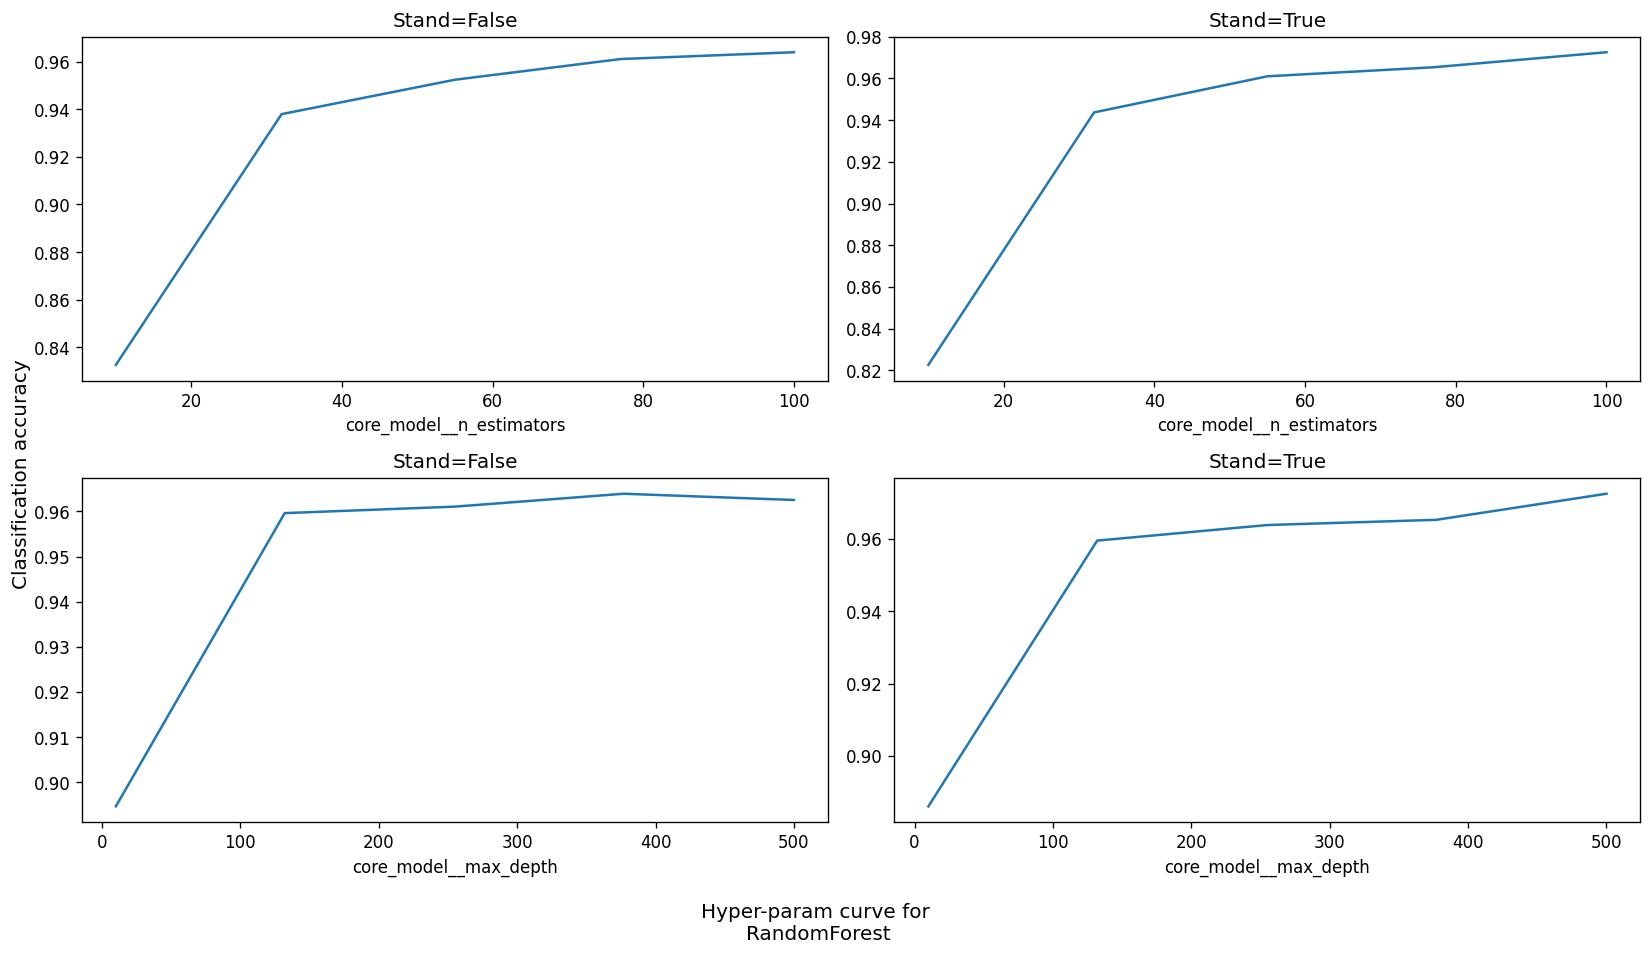

,[TRAIN] RandomForest (Stand=False),[TEST] RandomForest (Stand=False),[TRAIN] RandomForest (Stand=True),[TEST] RandomForest (Stand=True)
Accuracy,1.000000,0.979798,1.000000,0.973064
Precision,1.000000,0.979798,1.000000,0.973064
Recall,1.000000,0.979798,1.000000,0.973064
F1 Score,1.000000,0.979798,1.000000,0.973064
ROC AUC,1.000000,0.999908,1.000000,0.999708
Log loss,0.240603,0.826229,0.243192,0.821880


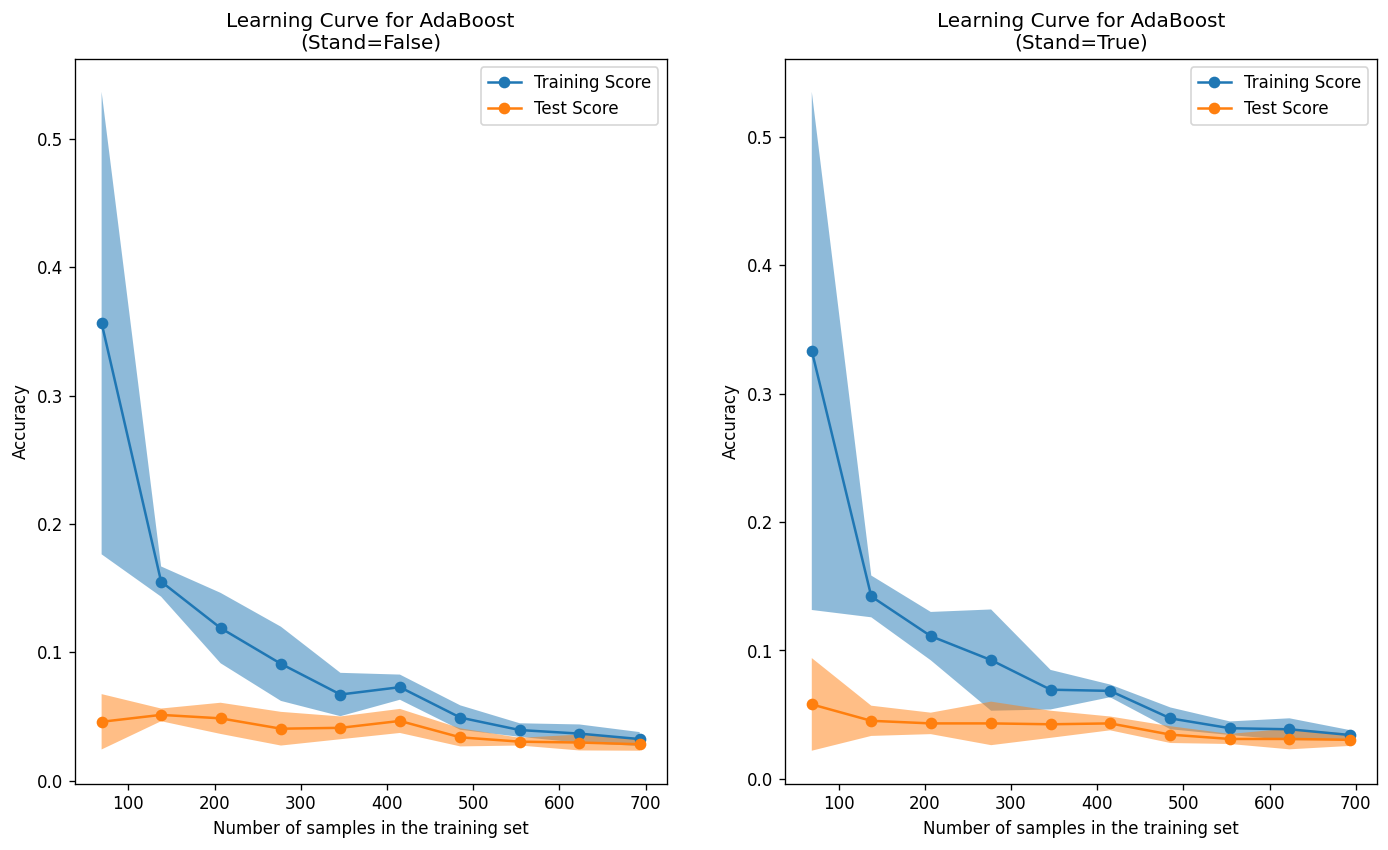

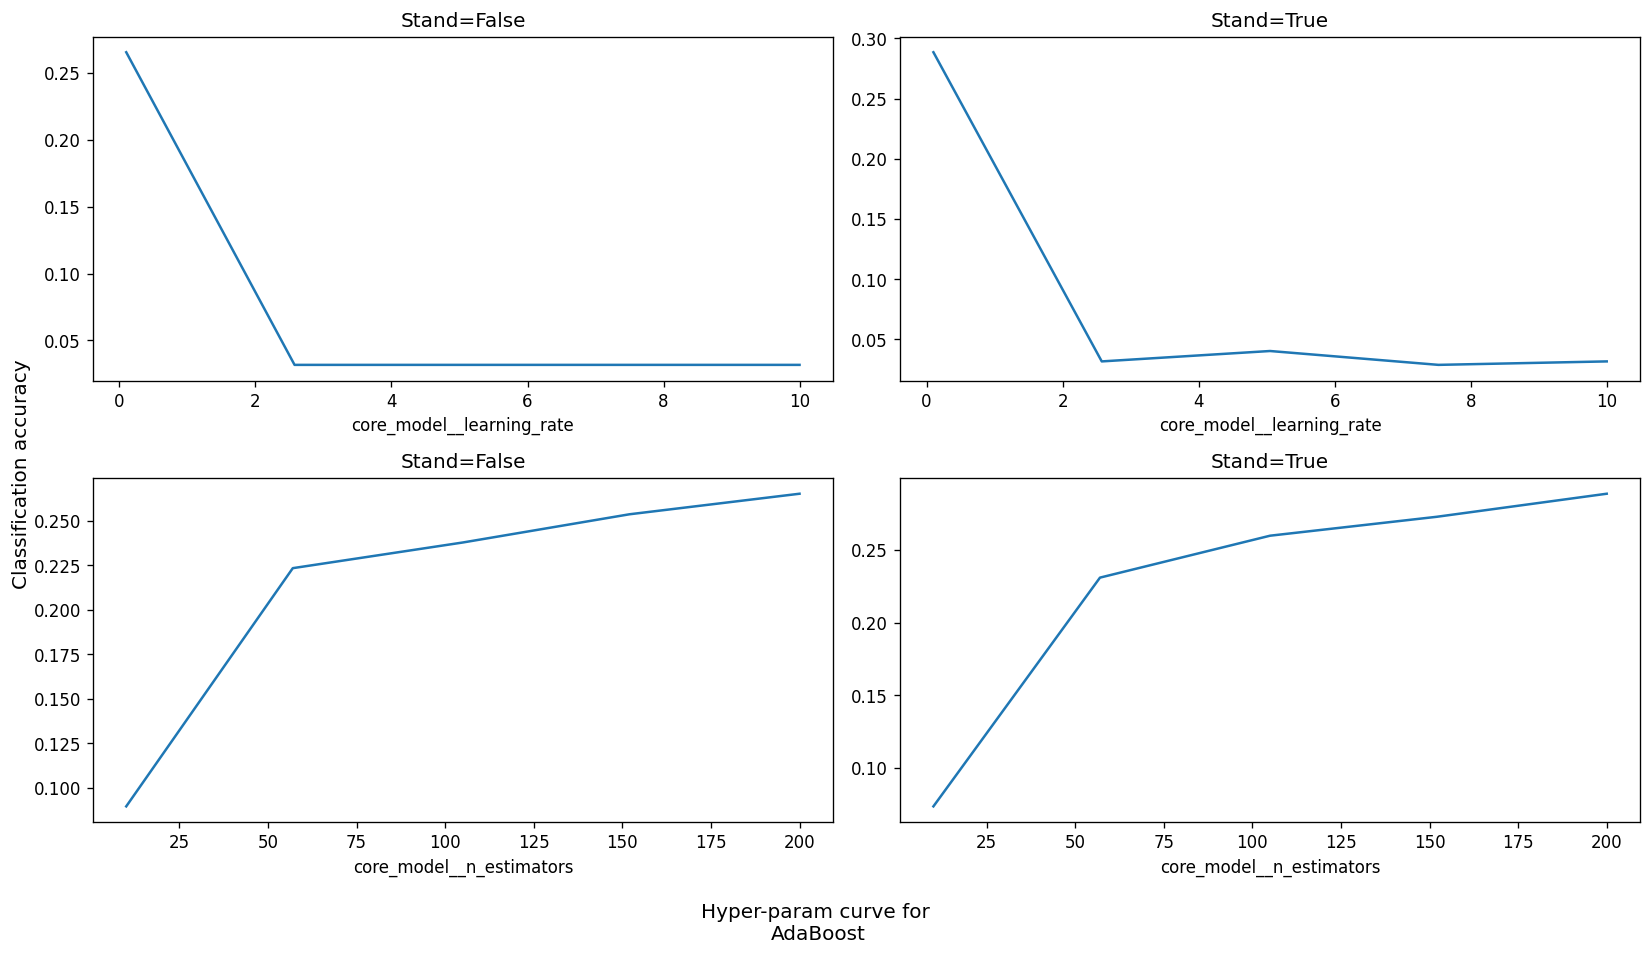

,[TRAIN] AdaBoost (Stand=False),[TEST] AdaBoost (Stand=False),[TRAIN] AdaBoost (Stand=True),[TEST] AdaBoost (Stand=True)
Accuracy,0.422799,0.286195,0.422799,0.282828
Precision,0.422799,0.286195,0.422799,0.282828
Recall,0.422799,0.286195,0.422799,0.282828
F1 Score,0.422799,0.286195,0.422799,0.282828
ROC AUC,0.986153,0.959493,0.986153,0.959184
Log loss,3.102933,3.334166,3.102933,3.341709


In [9]:
# Random Forest
mt = ModelTester("RandomForest")
mt.test(dataset, train_set, test_set)

# Ada Boost
mt = ModelTester("AdaBoost")
mt.test(dataset, train_set, test_set)

# Gradient Boosted Trees
# mt = ModelTester("GradientBoostedTrees")
# mt.test(dataset, train_set, test_set)

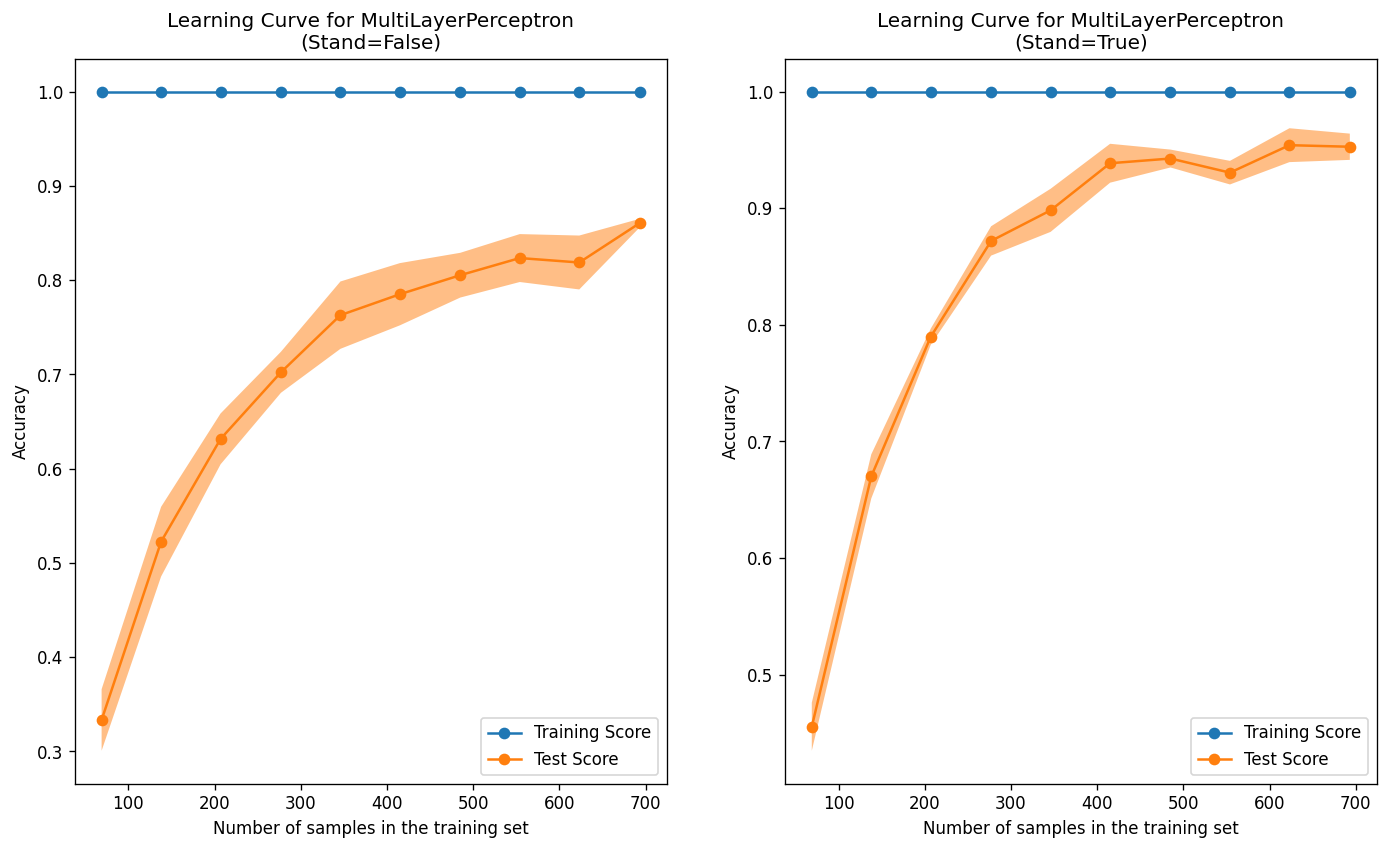

,[TRAIN] MultiLayerPerceptron (Stand=False),[TEST] MultiLayerPerceptron (Stand=False),[TRAIN] MultiLayerPerceptron (Stand=True),[TEST] MultiLayerPerceptron (Stand=True)
Accuracy,1.000000,0.828283,1.000000,0.969697
Precision,1.000000,0.828283,1.000000,0.969697
Recall,1.000000,0.828283,1.000000,0.969697
F1 Score,1.000000,0.828283,1.000000,0.969697
ROC AUC,1.000000,0.996736,1.000000,0.997629
Log loss,0.000166,1.691381,0.000046,0.278084


In [10]:
mt = ModelTester("MultiLayerPerceptron")
mt.test(dataset, train_set, test_set)

In [11]:
from models.Models import *

# Load Test Data
test_dl = DataLoader("data/test.csv", class_col_name="id")
test_dl.load()
submission_set = test_dl.get_dataset()

In [12]:
lc = LogisticClassifier(stand_trans=True)
lc.train(dataset)
probs, classes = lc.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/logi_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,0.000713,0.000234,0.000257,0.000011,0.006907,1.234153e-07,0.000412,0.009839,0.000937,5.834292e-07,...,0.000029,9.860755e-07,0.000480,0.000301,0.000007,0.000003,0.000008,0.000087,0.000038,0.000052
7,0.003907,0.000015,0.000065,0.003217,0.001017,8.848424e-04,0.000327,0.000103,0.000402,2.548605e-04,...,0.000721,1.051128e-03,0.000076,0.000112,0.001994,0.000222,0.000004,0.000589,0.000594,0.000016
9,0.000726,0.000892,0.000341,0.000424,0.000836,4.110980e-05,0.000471,0.000516,0.000872,5.156067e-04,...,0.000244,1.121549e-04,0.000235,0.000259,0.002273,0.000963,0.000062,0.000082,0.000028,0.000252
12,0.000354,0.000034,0.000168,0.002099,0.000195,5.829464e-05,0.000170,0.000160,0.000145,7.702198e-04,...,0.001057,3.420752e-04,0.000480,0.000506,0.820919,0.028590,0.000008,0.000074,0.000058,0.000253
13,0.000025,0.002252,0.000015,0.001275,0.000044,1.954818e-06,0.000079,0.000155,0.000151,3.803603e-04,...,0.000223,3.128801e-05,0.000291,0.000250,0.000050,0.005975,0.000042,0.000014,0.000008,0.000951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.000350,0.000632,0.000195,0.000347,0.000743,4.277660e-05,0.000335,0.000184,0.000263,3.068796e-04,...,0.000126,5.649465e-05,0.000142,0.000138,0.000961,0.001881,0.000037,0.000125,0.000017,0.000272
1577,0.003474,0.000902,0.003115,0.011944,0.001371,7.538366e-06,0.005226,0.000075,0.015078,4.137866e-04,...,0.000084,1.463269e-03,0.000520,0.000289,0.002195,0.002119,0.000188,0.000185,0.000299,0.006346
1579,0.000027,0.000352,0.020634,0.000002,0.000230,7.433538e-07,0.932753,0.000259,0.003780,2.129533e-06,...,0.000017,4.046498e-04,0.001225,0.000092,0.000033,0.000005,0.003628,0.000007,0.000464,0.000197
1580,0.000346,0.000122,0.000015,0.000211,0.000023,7.104418e-05,0.000005,0.000001,0.000010,2.498512e-04,...,0.000067,1.195737e-03,0.000007,0.000012,0.011736,0.000034,0.000007,0.000842,0.000248,0.000007


In [13]:
svm = SupportVectorMachine(stand_trans=True)
svm.train(dataset)
probs, classes = svm.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/svm_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,0.007241,0.009648,0.009659,0.005629,0.021322,0.003318,0.011899,0.024152,0.010360,0.004098,...,0.005038,0.004607,0.008601,0.009505,0.004472,0.004707,0.006116,0.005565,0.009618,0.005854
7,0.027840,0.004726,0.006142,0.016560,0.010663,0.011073,0.008005,0.003663,0.007103,0.005796,...,0.007893,0.013997,0.005586,0.004674,0.015741,0.006649,0.003681,0.009900,0.015719,0.003975
9,0.011571,0.014247,0.010617,0.012657,0.010539,0.004516,0.012018,0.005675,0.011494,0.007056,...,0.005067,0.008439,0.007833,0.006110,0.011196,0.012666,0.005589,0.004570,0.008289,0.006691
12,0.012546,0.008124,0.007690,0.021396,0.007428,0.005121,0.007992,0.004510,0.008013,0.009930,...,0.008410,0.009954,0.008745,0.006640,0.091706,0.026497,0.004544,0.005021,0.008280,0.008133
13,0.007947,0.024291,0.006794,0.016451,0.006586,0.003474,0.008197,0.005361,0.008562,0.010321,...,0.006802,0.007323,0.010911,0.007263,0.007796,0.027302,0.006261,0.004189,0.006574,0.012148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.011765,0.014191,0.010521,0.013756,0.010975,0.004828,0.011725,0.004969,0.009600,0.007310,...,0.004865,0.008131,0.007193,0.006040,0.010556,0.016253,0.005399,0.005207,0.008214,0.007387
1577,0.016162,0.013282,0.015313,0.024891,0.008970,0.003175,0.016001,0.003393,0.021765,0.006470,...,0.003769,0.013084,0.007049,0.005147,0.010305,0.013036,0.005475,0.004636,0.009573,0.013721
1579,0.006935,0.010376,0.038374,0.004460,0.009425,0.003426,0.124521,0.006902,0.020634,0.003260,...,0.004237,0.011936,0.012212,0.005877,0.004635,0.003942,0.019906,0.004097,0.016204,0.006584
1580,0.014097,0.011951,0.006779,0.010635,0.007524,0.007399,0.006595,0.004638,0.006165,0.010141,...,0.007371,0.016463,0.006221,0.005454,0.020987,0.007199,0.006034,0.011430,0.015336,0.006228


In [14]:
mlp = MultiLayerPerceptron(stand_trans=True)
mlp.train(dataset)
probs, classes = mlp.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/mlp_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,2.108127e-57,2.278757e-56,4.395998e-33,4.293418e-55,2.927178e-16,9.782530e-86,1.766170e-35,2.571371e-17,2.708430e-49,1.833534e-73,...,1.603741e-80,3.092231e-60,6.487136e-31,2.573076e-43,2.490155e-62,7.587887e-74,2.358902e-54,1.899615e-79,1.215632e-29,2.397686e-52
7,1.101888e-15,1.917630e-49,1.369304e-50,8.251285e-16,1.520267e-25,2.431598e-16,3.754363e-44,7.592518e-54,2.137209e-48,9.352673e-34,...,1.173650e-28,7.073473e-26,3.078814e-37,9.333796e-46,1.432189e-15,1.546076e-24,1.201051e-54,7.724259e-23,7.841995e-10,1.318879e-40
9,1.068852e-41,6.165440e-12,4.655984e-39,1.117371e-19,6.600164e-30,1.883991e-55,1.175103e-44,1.520261e-39,5.604737e-42,3.350042e-28,...,2.088820e-48,7.032008e-37,7.761522e-27,2.694221e-53,1.245579e-21,5.341301e-24,7.559629e-55,4.184099e-42,8.639472e-35,2.625879e-26
12,5.988990e-44,3.750626e-41,2.444677e-62,4.007386e-19,4.559255e-39,2.195504e-56,4.240403e-70,2.518375e-66,1.614858e-48,9.645476e-43,...,2.377811e-59,1.176349e-36,1.156635e-43,1.759495e-68,9.933536e-01,1.917868e-19,8.355667e-87,1.241015e-62,5.252182e-43,8.604946e-35
13,2.663047e-50,5.271457e-12,1.295241e-48,2.633069e-23,3.320313e-31,2.690931e-74,1.258715e-60,1.291758e-43,8.533893e-46,3.685227e-38,...,7.038945e-77,3.634936e-38,2.509012e-35,4.977517e-51,1.854313e-30,2.371704e-19,8.295002e-70,3.979991e-66,4.552892e-45,9.689427e-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,4.598337e-39,1.146646e-08,7.859922e-37,2.275721e-16,1.592198e-28,1.750055e-54,2.418850e-45,5.286662e-40,4.347793e-40,5.954153e-25,...,4.688431e-49,5.532616e-34,3.958350e-29,1.794626e-52,1.328858e-20,1.452278e-20,1.358346e-55,4.596566e-40,3.651010e-35,3.047783e-23
1577,3.187733e-26,7.196521e-15,8.913187e-19,2.663874e-21,1.324452e-30,9.827485e-49,1.119344e-28,1.303792e-46,1.730510e-07,5.688333e-33,...,1.462136e-66,1.112452e-13,1.336905e-24,6.699632e-51,6.450602e-18,2.837660e-34,1.516963e-47,3.645807e-41,3.391799e-24,3.345255e-14
1579,1.103270e-43,2.128827e-36,3.610985e-14,1.056278e-53,2.435735e-44,1.062067e-62,1.000000e+00,5.126011e-52,1.066189e-21,2.314238e-66,...,8.911909e-78,5.714269e-37,9.996610e-21,2.476993e-59,1.870052e-49,4.145420e-71,2.732608e-21,1.060441e-51,3.475306e-22,1.600224e-37
1580,1.725646e-26,1.115422e-32,6.547316e-59,1.094645e-31,1.315815e-43,7.303785e-48,2.194541e-54,5.489497e-71,2.113390e-52,5.933446e-30,...,1.283766e-64,1.615173e-25,3.952201e-51,2.426875e-56,4.461932e-22,8.022161e-36,2.452604e-60,1.664646e-25,2.190486e-30,4.394609e-38


In [15]:
rf = RandomForest(stand_trans=True)
rf.train(dataset)
probs, classes = rf.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/rf_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,0.012987,0.000000,0.000000,0.000000,0.025974,0.000000,0.000000,0.077922,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
7,0.051948,0.000000,0.000000,0.012987,0.012987,0.051948,0.000000,0.000000,0.000000,0.025974,...,0.012987,0.012987,0.0,0.000000,0.025974,0.000000,0.0,0.012987,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.025974,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.012987,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12,0.025974,0.000000,0.000000,0.064935,0.012987,0.000000,0.000000,0.012987,0.000000,0.000000,...,0.012987,0.000000,0.0,0.000000,0.246753,0.116883,0.0,0.000000,0.012987,0.000000
13,0.000000,0.077922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.025974,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.012987,0.0,0.000000,0.000000,0.000000
1577,0.000000,0.025974,0.025974,0.000000,0.000000,0.000000,0.012987,0.000000,0.012987,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.051948
1579,0.000000,0.025974,0.025974,0.000000,0.000000,0.000000,0.454545,0.000000,0.051948,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.012987
1580,0.038961,0.000000,0.000000,0.012987,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987,...,0.000000,0.051948,0.0,0.000000,0.012987,0.000000,0.0,0.090909,0.000000,0.000000
